In [45]:
import pandas as pd 
import geopandas as gpd 
from shapely.geometry import Point, Polygon

gw_df = pd.read_csv("../../notebooks-and-markdowns/gw_final_df.csv")

In [48]:
gw_df = gw_df[gw_df['SoilMoi0_10cm_inst'].notnull()]

In [49]:
gw_df
df_subset = gw_df[gw_df['time']=='2023-03-01']
df_subset

,time,lon,lat,lwe_thickness,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,d_SWE_inst,d_SoilMoi0_10cm_inst,d_SWE_inst_meters,d_SoilMoi0_10cm_inst_meters,lwe,gw_estimate
252008,2023-03-01,-104.875,41.125,-1.903475,0.957661,16.742096,75.926670,39.121820,170.80942,-2.019674,-1.053337,-0.201967,-0.105334,-0.019035,0.288266
252009,2023-03-01,-104.875,41.375,-1.903475,0.911855,16.597948,68.842740,33.696503,166.66685,-2.065480,-1.197485,-0.206548,-0.119748,-0.019035,0.307262
252010,2023-03-01,-104.625,41.125,-1.903475,0.857581,17.045261,85.004420,55.947420,170.75407,-2.119754,-0.750172,-0.211975,-0.075017,-0.019035,0.267958
252011,2023-03-01,-104.625,41.375,-1.903475,0.900121,17.031145,80.708170,47.076523,167.16246,-2.077214,-0.764288,-0.207721,-0.076429,-0.019035,0.265115
252012,2023-03-01,-106.875,34.625,-8.407810,0.000202,11.192073,35.035570,71.356636,122.98175,-2.977133,-6.603360,-0.297713,-0.660336,-0.084078,0.873971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253159,2023-03-01,-111.625,38.375,-4.889222,31.808588,43.425484,84.489150,58.743336,176.25543,28.831253,25.630050,2.883125,2.563005,-0.048892,-5.495023
253160,2023-03-01,-109.375,42.125,-5.858991,110.050964,22.758923,58.513230,51.794388,173.39406,107.073630,4.963489,10.707363,0.496349,-0.058590,-11.262302
253161,2023-03-01,-109.375,42.375,-5.858991,116.150970,23.248468,53.135635,48.290390,174.91302,113.173640,5.453035,11.317364,0.545304,-0.058590,-11.921257
253162,2023-03-01,-109.125,42.125,-5.858991,112.066980,21.882370,61.174572,68.428390,177.41586,109.089645,4.086937,10.908965,0.408694,-0.058590,-11.376248


In [50]:
#df_subset.plot(x=df_subset.lon, y=df_subset.lat)
geometry = [Point(xy) for xy in zip(df_subset['lon'], df_subset['lat'])]
geometry[:3]

geo_df = gpd.GeoDataFrame(df_subset, #specify our data
                          crs='epsg:4326', #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

,time,lon,lat,lwe_thickness,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,d_SWE_inst,d_SoilMoi0_10cm_inst,d_SWE_inst_meters,d_SoilMoi0_10cm_inst_meters,lwe,gw_estimate,geometry
252008,2023-03-01,-104.875,41.125,-1.903475,0.957661,16.742096,75.92667,39.121820,170.80942,-2.019674,-1.053337,-0.201967,-0.105334,-0.019035,0.288266,POINT (-104.87500 41.12500)
252009,2023-03-01,-104.875,41.375,-1.903475,0.911855,16.597948,68.84274,33.696503,166.66685,-2.065480,-1.197485,-0.206548,-0.119748,-0.019035,0.307262,POINT (-104.87500 41.37500)
252010,2023-03-01,-104.625,41.125,-1.903475,0.857581,17.045261,85.00442,55.947420,170.75407,-2.119754,-0.750172,-0.211975,-0.075017,-0.019035,0.267958,POINT (-104.62500 41.12500)
252011,2023-03-01,-104.625,41.375,-1.903475,0.900121,17.031145,80.70817,47.076523,167.16246,-2.077214,-0.764288,-0.207721,-0.076429,-0.019035,0.265115,POINT (-104.62500 41.37500)
252012,2023-03-01,-106.875,34.625,-8.407810,0.000202,11.192073,35.03557,71.356636,122.98175,-2.977133,-6.603360,-0.297713,-0.660336,-0.084078,0.873971,POINT (-106.87500 34.62500)


In [51]:
geo_df

,time,lon,lat,lwe_thickness,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,d_SWE_inst,d_SoilMoi0_10cm_inst,d_SWE_inst_meters,d_SoilMoi0_10cm_inst_meters,lwe,gw_estimate,geometry
252008,2023-03-01,-104.875,41.125,-1.903475,0.957661,16.742096,75.926670,39.121820,170.80942,-2.019674,-1.053337,-0.201967,-0.105334,-0.019035,0.288266,POINT (-104.87500 41.12500)
252009,2023-03-01,-104.875,41.375,-1.903475,0.911855,16.597948,68.842740,33.696503,166.66685,-2.065480,-1.197485,-0.206548,-0.119748,-0.019035,0.307262,POINT (-104.87500 41.37500)
252010,2023-03-01,-104.625,41.125,-1.903475,0.857581,17.045261,85.004420,55.947420,170.75407,-2.119754,-0.750172,-0.211975,-0.075017,-0.019035,0.267958,POINT (-104.62500 41.12500)
252011,2023-03-01,-104.625,41.375,-1.903475,0.900121,17.031145,80.708170,47.076523,167.16246,-2.077214,-0.764288,-0.207721,-0.076429,-0.019035,0.265115,POINT (-104.62500 41.37500)
252012,2023-03-01,-106.875,34.625,-8.407810,0.000202,11.192073,35.035570,71.356636,122.98175,-2.977133,-6.603360,-0.297713,-0.660336,-0.084078,0.873971,POINT (-106.87500 34.62500)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253159,2023-03-01,-111.625,38.375,-4.889222,31.808588,43.425484,84.489150,58.743336,176.25543,28.831253,25.630050,2.883125,2.563005,-0.048892,-5.495023,POINT (-111.62500 38.37500)
253160,2023-03-01,-109.375,42.125,-5.858991,110.050964,22.758923,58.513230,51.794388,173.39406,107.073630,4.963489,10.707363,0.496349,-0.058590,-11.262302,POINT (-109.37500 42.12500)
253161,2023-03-01,-109.375,42.375,-5.858991,116.150970,23.248468,53.135635,48.290390,174.91302,113.173640,5.453035,11.317364,0.545304,-0.058590,-11.921257,POINT (-109.37500 42.37500)
253162,2023-03-01,-109.125,42.125,-5.858991,112.066980,21.882370,61.174572,68.428390,177.41586,109.089645,4.086937,10.908965,0.408694,-0.058590,-11.376248,POINT (-109.12500 42.12500)


<Axes: >

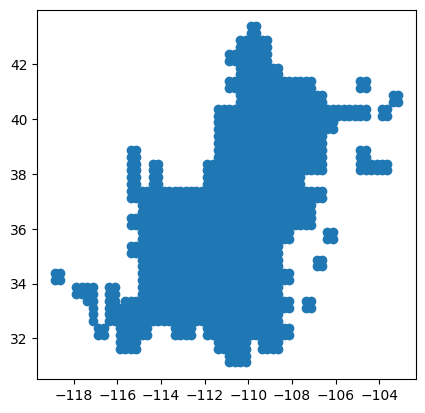

In [53]:
geo_df.plot()

In [74]:
geo_df

,time,lon,lat,lwe_thickness,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,d_SWE_inst,d_SoilMoi0_10cm_inst,d_SWE_inst_meters,d_SoilMoi0_10cm_inst_meters,lwe,gw_estimate,geometry
252008,2023-03-01,-104.875,41.125,-1.903475,0.957661,16.742096,75.926670,39.121820,170.80942,-2.019674,-1.053337,-0.201967,-0.105334,-0.019035,0.288266,POINT (-104.87500 41.12500)
252009,2023-03-01,-104.875,41.375,-1.903475,0.911855,16.597948,68.842740,33.696503,166.66685,-2.065480,-1.197485,-0.206548,-0.119748,-0.019035,0.307262,POINT (-104.87500 41.37500)
252010,2023-03-01,-104.625,41.125,-1.903475,0.857581,17.045261,85.004420,55.947420,170.75407,-2.119754,-0.750172,-0.211975,-0.075017,-0.019035,0.267958,POINT (-104.62500 41.12500)
252011,2023-03-01,-104.625,41.375,-1.903475,0.900121,17.031145,80.708170,47.076523,167.16246,-2.077214,-0.764288,-0.207721,-0.076429,-0.019035,0.265115,POINT (-104.62500 41.37500)
252012,2023-03-01,-106.875,34.625,-8.407810,0.000202,11.192073,35.035570,71.356636,122.98175,-2.977133,-6.603360,-0.297713,-0.660336,-0.084078,0.873971,POINT (-106.87500 34.62500)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253159,2023-03-01,-111.625,38.375,-4.889222,31.808588,43.425484,84.489150,58.743336,176.25543,28.831253,25.630050,2.883125,2.563005,-0.048892,-5.495023,POINT (-111.62500 38.37500)
253160,2023-03-01,-109.375,42.125,-5.858991,110.050964,22.758923,58.513230,51.794388,173.39406,107.073630,4.963489,10.707363,0.496349,-0.058590,-11.262302,POINT (-109.37500 42.12500)
253161,2023-03-01,-109.375,42.375,-5.858991,116.150970,23.248468,53.135635,48.290390,174.91302,113.173640,5.453035,11.317364,0.545304,-0.058590,-11.921257,POINT (-109.37500 42.37500)
253162,2023-03-01,-109.125,42.125,-5.858991,112.066980,21.882370,61.174572,68.428390,177.41586,109.089645,4.086937,10.908965,0.408694,-0.058590,-11.376248,POINT (-109.12500 42.12500)


[]

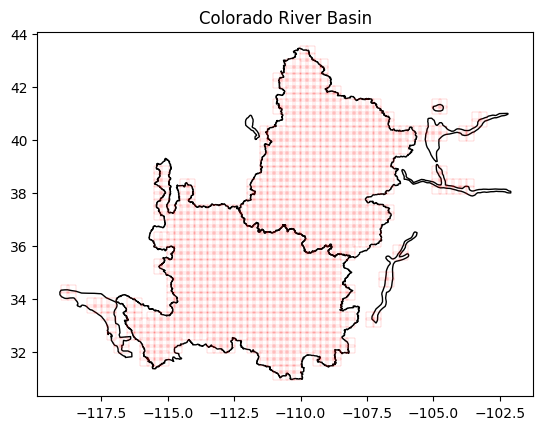

In [82]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

shpfl = gpd.read_file("/home/kmk58/remoteData/shapefiles/Colorado_River_Basin_Hydrological_Boundaries_with_Areas_served_by_Colorado_River.shp")
#ax = shpfl.plot()

# plot of entire Colorado River Basin
plt.style.use('default')
#plt.figure(figsize=[10,10])
#basemap = 

shpfl.plot(facecolor='none', edgecolor='black')
#ax.set_axis_off()
plt.title("Colorado River Basin")
#plt.grid(which="minor")
#plt.minorticks_on()
#plt.show()
plt.scatter(geo_df["lon"],geo_df["lat"], marker='s', facecolor='none',color='red', linewidth=.1)
#sp = geo_df.plot(marker='o', facecolor='none',color='red', markersize=1)

#sp.plot(basemap,color='red', markersize=1)
sp.plot()

<Axes: >

<Figure size 1000x1000 with 0 Axes>

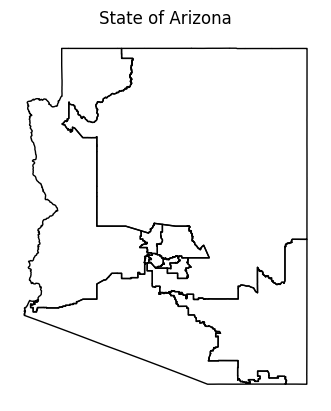

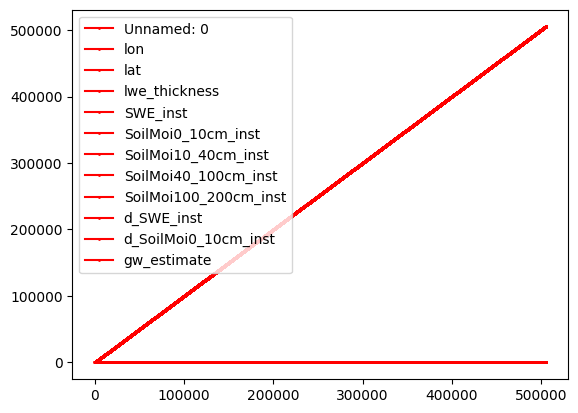

In [32]:
shpfl = gpd.read_file("/home/kmk58/data/tl_rd22_04_cd118.shp")

# plot of entire Colorado River Basin
plt.style.use('default')
plt.figure(figsize=[10,10])
base = shpfl.plot(facecolor='none', edgecolor='black').set_axis_off()
plt.title("State of Arizona")
#plt.grid(which="minor")
#plt.minorticks_on()
#plt.show()
base

df_subset = gw_df[gw_df['time']=='2023-03-01']

gw_df.plot(x=base, marker='o', color='red', markersize=1)